# K-Nearest Neighbors


## Introduction

Ensemble methods are kinds of methods using multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone.

## Dataset 
The Digits dataset is a collection of digit images designed for experimenting with image recognition techniques. It is a smaller subset of the MNIST dataset, which includes images of handwritten digits.Here are features,targets and additional information:

**Features：**
- The pixel values are integers ranging from 0 (white) to 16 (black), representing the grayscale intensity.
- Each feature in the dataset is a pixel value at a specific position in an 8x8 image of a handwritten digit.

**Target：**
- The target attribute is the digit itself, ranging from 0 to 9.
- The dataset includes 1797 labels corresponding to these images, indicating which digit each image represents.

**Additional Information：**
- DESCR: Provides a complete description of the dataset.
- images: The array of raw image data, structured as 8x8 arrays.
- target_names: Names of the target classes, which are digits from 0 to 9.
- data: The attribute (feature) data in a shape of (1797, 64), which is a two-dimensional array where each row represents one example, and the columns are the flattened pixel values.

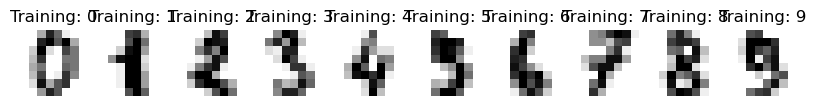

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# 1. Dataset Creation and Visualization
digits = load_digits()
X = digits.data
y = digits.target

# Visualizing some of the digits
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Accuracy Rate vs. K Value

Accuracy for K=1: 0.9833
Accuracy for K=2: 0.9833
Accuracy for K=3: 0.9889
Accuracy for K=4: 0.9870
Accuracy for K=5: 0.9926
Accuracy for K=6: 0.9944
Accuracy for K=7: 0.9907
Accuracy for K=8: 0.9870
Accuracy for K=9: 0.9815
Accuracy for K=10: 0.9815
Accuracy for K=11: 0.9796
Accuracy for K=12: 0.9778
Accuracy for K=13: 0.9778
Accuracy for K=14: 0.9759
Accuracy for K=15: 0.9759
Accuracy for K=16: 0.9759
Accuracy for K=17: 0.9778
Accuracy for K=18: 0.9741
Accuracy for K=19: 0.9722


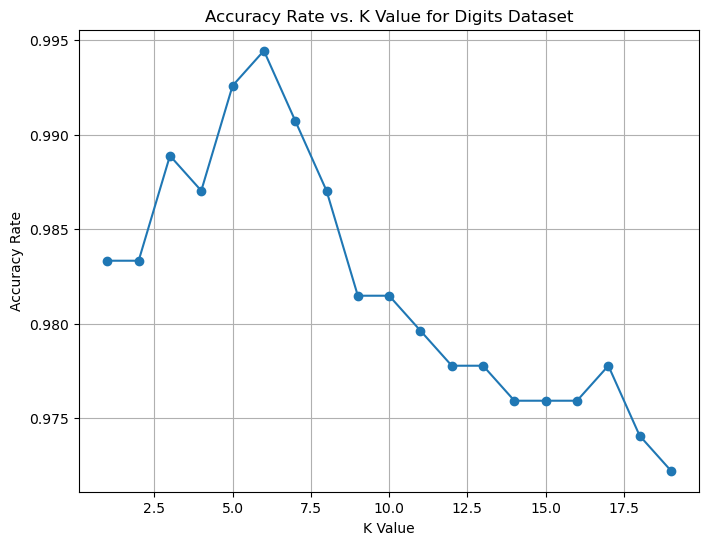

In [13]:
# 2. Impact of K Value and Accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
accuracy_rates = []

for K in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_rates.append(accuracy)
    print(f'Accuracy for K={K}: {accuracy:.4f}')

# Plotting the accuracy rates
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), accuracy_rates, marker='o')
plt.title('Accuracy Rate vs. K Value for Digits Dataset')
plt.xlabel('K Value')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()


## Choosing the Right Value for K

When implementing the k-Nearest Neighbors algorithm, the choice of 'k' is pivotal to the model's performance. 'k' determines the number of neighbors considered when making a prediction, and thus directly influences the classification accuracy and the generalization ability of the model.

### Factors Influencing the Choice of K
- Noise in the Data: A smaller 'k' value can be sensitive to noise in the data, while a larger 'k' can smooth out the effects of noise.
- Decision Boundaries: A smaller 'k' results in more complex decision boundaries, potentially leading to overfitting. A larger 'k' simplifies the decision boundaries, which can reduce overfitting but might increase bias.
- Dataset Size: For larger datasets, a larger 'k' might be necessary to capture enough information in the neighborhood.

### Methods to Determine the Best K
- Cross-Validation: Use cross-validation to test the model's performance with different 'k' values. Choose the 'k' that yields the best validation accuracy.
- Error Rate vs. K Plot: Plot the model's error rate against different 'k' values. The 'k' at which the error rate stabilizes or minimizes is often a good choice.
- Elbow Method: Similar to the above, but look for a 'k' where an increase in 'k' doesn't lead to significant improvement in performance – the "elbow" point.

## Model Evaluation and Analysis

In [8]:
# 3. Model Evaluation
best_k = np.argmax(accuracy_rates) + 1
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)
print("Best K:", best_k)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Best K: 6
Confusion Matrix:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 55  0  0]
 [ 0  0  0  0  0  0  0  0 43  0]
 [ 0  0  0  1  1  1  0  0  0 56]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      0.95      0.97        59

    accuracy        

### Confusion Matrix Analysis
- Diagonal elements (e.g., 53 for class 0, 50 for class 1, etc.) represent the number of correct predictions for each class.
- Off-diagonal elements would show the number of misclassifications between classes. For example, the entry [9, 6] (last row, seventh column) shows that 1 instance that is true class 9 was predicted as class 6. Another misclassification is in the [9, 8] position, where class 9 was incorrectly predicted as class 8.

For the matrix:
- Classes 0, 1, 2, 6, 7, and 8 have perfect classification with no misclassifications.
- Classes 3, 4, 5, and 9 have some errors, but these are very minimal.

### Classification Report Analysis
- Precision: Indicates the accuracy of positive predictions. For example, class 0 has a precision of 1.00, meaning that every instance predicted as class 0 was correct.
- Recall: Indicates the ability of the classifier to find all positive instances. For class 3, the recall is 1.00, meaning all actual class 3 instances were correctly identified.
- F1-Score: Harmonic mean of precision and recall. It's a single metric that combines both precision and recall to give a balanced measure of -he classifier's accuracy.
- Support: The number of true instances for each class. It’s important for assessing the representation of each class in the test dataset.

Classes 0, 1, 2, 6, 7, and 8 show perfect scores across precision, recall, and F1-score.

Class 9 shows slightly lower performance (precision 1.00, recall 0.95, F1-score 0.97), likely due to the few misclassifications as seen in the confusion matrix.

**In summary**:these metrics suggest that the model performs exceptionally well across all classes, with minimal errors and high accuracy, making it very effective for this particular classification task.

In [9]:
# 4. Choosing the Best K Value
# Using cross-validation to find the best K value
k_range = range(1, 10)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

best_k_cv = np.argmax(k_scores) + 1
print("Best K determined by cross-validation:", best_k_cv)

Best K determined by cross-validation: 1


## Recommender Systems with k-Nearest Neighbors

Recommender systems, also known as recommendation systems or recommendation engines, play a crucial role in helping users discover relevant items, such as movies, books, products, or content, based on their preferences and historical interactions. One approach to building such systems is to leverage the power of k-Nearest Neighbors (k-NN). k-NN-based recommender systems rely on the idea of finding users or items that are most similar to the target user or item. By identifying the k-nearest neighbors in terms of user preferences or item characteristics, these systems make recommendations based on the behaviors and preferences of similar users. k-NN-based recommender systems can be implemented for various types of recommendation tasks, including collaborative filtering, content-based filtering, and hybrid approaches, making them versatile tools for personalizing user experiences and enhancing engagement.

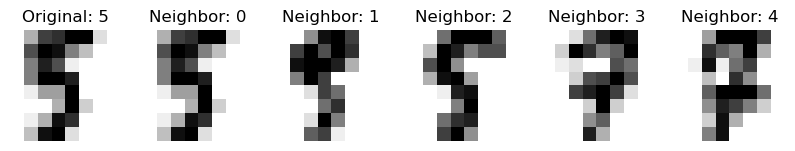

In [10]:
# 5. & 6. Recommender Systems with k-Nearest Neighbors
# Using PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Example of using KNN for item-based recommendation (items are digits)
# Using the reduced dataset to find similar items (digits)
knn_item = KNeighborsClassifier(n_neighbors=5, algorithm='brute', metric='euclidean')
knn_item.fit(X_pca, y)

# Pick a digit and find the 5 nearest similar digits
item_index = 15  # Example: Select item 15 from dataset
distances, indices = knn_item.kneighbors([X_pca[item_index]])

# Show the original item and its neighbors
fig, axes = plt.subplots(1, 6, figsize=(10, 3))
axes[0].imshow(digits.images[item_index], cmap=plt.cm.gray_r, interpolation='nearest')
axes[0].set_title('Original: %i' % digits.target[item_index])
axes[0].set_axis_off()
for i, (index, ax) in enumerate(zip(indices[0], axes[1:])):
    ax.imshow(digits.images[index], cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Neighbor: %i' % i)
    ax.set_axis_off()

plt.show()